# Setup

In [75]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Vanishing/Exploading Gradients Problem

In [76]:
def logit(z):
  return 1 / (1 + np.exp(-z))

[-5, 5, -0.2, 1.2]

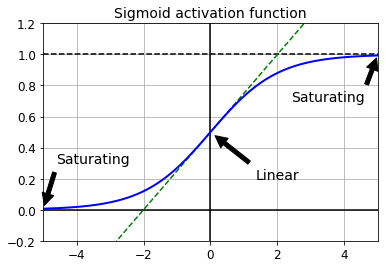

In [77]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), 'b-', linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha='center')
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha='center')
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha='center')
plt.grid(True)
plt.title('Sigmoid activation function', fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])


## Xavier and He Initialization

In [78]:
[name for name in dir(keras.initializers) if not name.startswith('_')]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [79]:
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

In [80]:
init = keras.initializers.VarianceScaling(scale=2.0, mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation='relu', kernel_initializer=init)

## Nonsaturating Activation Functions

### Leaky ReLU

In [81]:
def leaky_relu(z, alpha=0.01):
  return np.maximum(alpha*z, z)

[-5, 5, -0.5, 4.2]

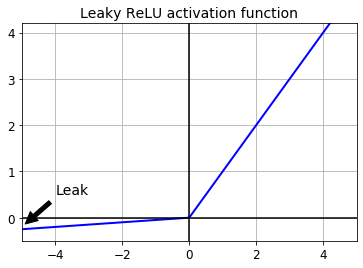

In [82]:
plt.plot(z, leaky_relu(z, 0.05), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha='center')
plt.title('Leaky ReLU activation function', fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])


In [83]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

In [84]:
[m for m in dir(keras.layers) if 'relu' in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [85]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [86]:
tf.random.set_seed(42)
np.random.seed(42)

In [87]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, kernel_initializer='he_normal'),
  keras.layers.LeakyReLU(),
  keras.layers.Dense(100, kernel_initializer='he_normal'),
  keras.layers.LeakyReLU(),
  keras.layers.Dense(10, activation='softmax')
])

In [88]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])

In [89]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 40us/sample - loss: 1.2810 - accuracy: 0.6205 - val_loss: 0.8869 - val_accuracy: 0.7160
Epoch 2/10
55000/55000 [==============================] - 2s 41us/sample - loss: 0.7952 - accuracy: 0.7369 - val_loss: 0.7132 - val_accuracy: 0.7626
Epoch 3/10
55000/55000 [==============================] - 2s 44us/sample - loss: 0.6817 - accuracy: 0.7726 - val_loss: 0.6385 - val_accuracy: 0.7894
Epoch 4/10
55000/55000 [==============================] - 2s 37us/sample - loss: 0.6219 - accuracy: 0.7942 - val_loss: 0.5931 - val_accuracy: 0.8016
Epoch 5/10
55000/55000 [==============================] - 2s 37us/sample - loss: 0.5830 - accuracy: 0.8074 - val_loss: 0.5607 - val_accuracy: 0.8170
Epoch 6/10
55000/55000 [==============================] - 2s 36us/sample - loss: 0.5552 - accuracy: 0.8172 - val_loss: 0.5355 - val_accuracy: 0.8238
Epoch 7/10
55000/55000 [==============================] -

In [90]:
tf.random.set_seed(42)
np.random.seed(42)

In [91]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, kernel_initializer='he_normal'),
  keras.layers.PReLU(),
  keras.layers.Dense(100, kernel_initializer='he_normal'),
  keras.layers.PReLU(),
  keras.layers.Dense(10, activation='softmax')
])

In [92]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])

In [93]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 45us/sample - loss: 1.3452 - accuracy: 0.6203 - val_loss: 0.9241 - val_accuracy: 0.7170
Epoch 2/10
55000/55000 [==============================] - 2s 40us/sample - loss: 0.8196 - accuracy: 0.7364 - val_loss: 0.7314 - val_accuracy: 0.7600
Epoch 3/10
55000/55000 [==============================] - 2s 40us/sample - loss: 0.6970 - accuracy: 0.7701 - val_loss: 0.6517 - val_accuracy: 0.7880
Epoch 4/10
55000/55000 [==============================] - 2s 40us/sample - loss: 0.6333 - accuracy: 0.7914 - val_loss: 0.6032 - val_accuracy: 0.8050
Epoch 5/10
55000/55000 [==============================] - 2s 40us/sample - loss: 0.5916 - accuracy: 0.8049 - val_loss: 0.5689 - val_accuracy: 0.8162
Epoch 6/10
55000/55000 [==============================] - 2s 40us/sample - loss: 0.5619 - accuracy: 0.8143 - val_loss: 0.5416 - val_accuracy: 0.8222
Epoch 7/10
55000/55000 [==============================] -

### ELU

In [94]:
def elu(z, alpha=1):
  return np.where(z < 0, alpha * (np.exp(z) - 1), z)

[-5, 5, -2.2, 3.2]

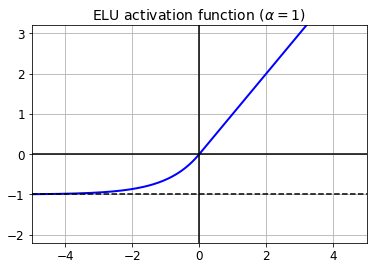

In [95]:
plt.plot(z, elu(z), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r'ELU activation function ($\alpha=1$)', fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])


In [96]:
keras.layers.Dense(10, activation='elu')

### SELU

In [97]:
from scipy.special import erfc

alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [98]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
  return scale * elu(z, alpha)

[-5, 5, -2.2, 3.2]

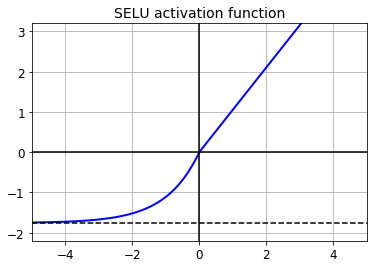

In [99]:
plt.plot(z, selu(z), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, - 1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title('SELU activation function', fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])


In [100]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100))
for layer in range(1000):
  W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100))
  Z = selu(np.dot(Z, W))
  means = np.mean(Z, axis=0).mean()
  stds = np.std(Z, axis=0).mean()
  if layer % 100 == 0:
    print('Layer {}: mean {:.2f}, std deviation {:.2f}'.format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [101]:
keras.layers.Dense(10, activation='selu', kernel_initializer='lecun_normal')

In [102]:
np.random.seed(42)
tf.random.set_seed(42)

In [103]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'))
for layer in range(99):
  model.add(keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [104]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])

In [105]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [106]:
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 14s 252us/sample - loss: 1.1277 - accuracy: 0.5573 - val_loss: 0.8152 - val_accuracy: 0.6700
Epoch 2/5
55000/55000 [==============================] - 12s 213us/sample - loss: 0.6935 - accuracy: 0.7383 - val_loss: 0.5806 - val_accuracy: 0.7928
Epoch 3/5
55000/55000 [==============================] - 12s 213us/sample - loss: 0.5871 - accuracy: 0.7865 - val_loss: 0.6876 - val_accuracy: 0.7462
Epoch 4/5
55000/55000 [==============================] - 12s 214us/sample - loss: 0.5281 - accuracy: 0.8134 - val_loss: 0.5236 - val_accuracy: 0.8230
Epoch 5/5
55000/55000 [==============================] - 12s 214us/sample - loss: 0.4824 - accuracy: 0.8327 - val_loss: 0.5201 - val_accuracy: 0.8312


In [107]:
np.random.seed(42)
tf.random.set_seed(42)

In [108]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'))
for layer in range(99):
  model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [109]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])

In [110]:
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 13s 239us/sample - loss: 1.7518 - accuracy: 0.2797 - val_loss: 1.2328 - val_accuracy: 0.4720
Epoch 2/5
55000/55000 [==============================] - 11s 197us/sample - loss: 1.1922 - accuracy: 0.4982 - val_loss: 1.0247 - val_accuracy: 0.5354
Epoch 3/5
55000/55000 [==============================] - 11s 197us/sample - loss: 0.9390 - accuracy: 0.6180 - val_loss: 1.0809 - val_accuracy: 0.5118
Epoch 4/5
55000/55000 [==============================] - 11s 197us/sample - loss: 0.7787 - accuracy: 0.6937 - val_loss: 0.7067 - val_accuracy: 0.7344
Epoch 5/5
55000/55000 [==============================] - 11s 197us/sample - loss: 0.7465 - accuracy: 0.7122 - val_loss: 0.9720 - val_accuracy: 0.5702


# Batch Normalization

In [111]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(300, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(10, activation='softmax')
])

In [112]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 784)               3136      
_________________________________________________________________
dense_430 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_7 (Batch (None, 300)               1200      
_________________________________________________________________
dense_431 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
dense_432 (Dense)            (None, 10)              

In [113]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization_6/gamma:0', True),
 ('batch_normalization_6/beta:0', True),
 ('batch_normalization_6/moving_mean:0', False),
 ('batch_normalization_6/moving_variance:0', False)]

In [114]:
bn1.updates

[<tf.Operation 'cond_2/Identity' type=Identity>,
 <tf.Operation 'cond_3/Identity' type=Identity>]

In [115]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])

In [116]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 62us/sample - loss: 0.8760 - accuracy: 0.7122 - val_loss: 0.5509 - val_accuracy: 0.8224
Epoch 2/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.5737 - accuracy: 0.8039 - val_loss: 0.4723 - val_accuracy: 0.8460
Epoch 3/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.5143 - accuracy: 0.8231 - val_loss: 0.4376 - val_accuracy: 0.8570
Epoch 4/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4826 - accuracy: 0.8333 - val_loss: 0.4135 - val_accuracy: 0.8638
Epoch 5/10
55000/55000 [==============================] - 3s 53us/sample - loss: 0.4571 - accuracy: 0.8415 - val_loss: 0.3990 - val_accuracy: 0.8654
Epoch 6/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4432 - accuracy: 0.8456 - val_loss: 0.3870 - val_accuracy: 0.8710
Epoch 7/10
55000/55000 [==============================] -

In [117]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(300, use_bias=False),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.Dense(100, use_bias=False),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(10, activation='softmax')
])

In [118]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])

In [119]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 62us/sample - loss: 0.8234 - accuracy: 0.7250 - val_loss: 0.5462 - val_accuracy: 0.8162
Epoch 2/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.5655 - accuracy: 0.8066 - val_loss: 0.4765 - val_accuracy: 0.8378
Epoch 3/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.5145 - accuracy: 0.8221 - val_loss: 0.4437 - val_accuracy: 0.8458
Epoch 4/10
55000/55000 [==============================] - 3s 55us/sample - loss: 0.4846 - accuracy: 0.8329 - val_loss: 0.4220 - val_accuracy: 0.8516
Epoch 5/10
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4602 - accuracy: 0.8400 - val_loss: 0.4093 - val_accuracy: 0.8554
Epoch 6/10
55000/55000 [==============================] - 3s 55us/sample - loss: 0.4447 - accuracy: 0.8448 - val_loss: 0.3998 - val_accuracy: 0.8590
Epoch 7/10
55000/55000 [==============================] -

## Gradient Clipping

In [120]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [121]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

## Reusing Pretrained Layers

### Reusing a Keras model

In [128]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [129]:
X_train_A.shape

(43986, 28, 28)

In [130]:
X_train_B.shape

(200, 28, 28)

In [131]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [132]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [133]:
tf.random.set_seed(42)
np.random.seed(42)

In [134]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
  model_A.add(keras.layers.Dense(n_hidden, activation='selu'))
model_A.add(keras.layers.Dense(8, activation='softmax'))

In [135]:
model_A.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])

In [136]:
history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))

Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 2s 49us/sample - loss: 0.5902 - accuracy: 0.8131 - val_loss: 0.3784 - val_accuracy: 0.8692
Epoch 2/20
43986/43986 [==============================] - 2s 52us/sample - loss: 0.3517 - accuracy: 0.8784 - val_loss: 0.3369 - val_accuracy: 0.8832
Epoch 3/20
43986/43986 [==============================] - 2s 43us/sample - loss: 0.3163 - accuracy: 0.8896 - val_loss: 0.3017 - val_accuracy: 0.8959
Epoch 4/20
43986/43986 [==============================] - 2s 52us/sample - loss: 0.2969 - accuracy: 0.8972 - val_loss: 0.2912 - val_accuracy: 0.9028
Epoch 5/20
43986/43986 [==============================] - 2s 45us/sample - loss: 0.2831 - accuracy: 0.9027 - val_loss: 0.2816 - val_accuracy: 0.9018
Epoch 6/20
43986/43986 [==============================] - 2s 43us/sample - loss: 0.2725 - accuracy: 0.9066 - val_loss: 0.2737 - val_accuracy: 0.9071
Epoch 7/20
43986/43986 [==============================] -

In [137]:
model_A.save('my_model_A.h5')

In [138]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
  model_B.add(keras.layers.Dense(n_hidden, activation='selu'))
model_B.add(keras.layers.Dense(1, activation='sigmoid'))

In [139]:
model_B.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])

In [140]:
history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 0s 2ms/sample - loss: 0.9509 - accuracy: 0.4800 - val_loss: 0.6533 - val_accuracy: 0.5568
Epoch 2/20
200/200 [==============================] - 0s 215us/sample - loss: 0.5837 - accuracy: 0.7100 - val_loss: 0.4825 - val_accuracy: 0.8479
Epoch 3/20
200/200 [==============================] - 0s 260us/sample - loss: 0.4527 - accuracy: 0.8750 - val_loss: 0.4097 - val_accuracy: 0.8945
Epoch 4/20
200/200 [==============================] - 0s 253us/sample - loss: 0.3869 - accuracy: 0.9050 - val_loss: 0.3630 - val_accuracy: 0.9209
Epoch 5/20
200/200 [==============================] - 0s 248us/sample - loss: 0.3404 - accuracy: 0.9300 - val_loss: 0.3302 - val_accuracy: 0.9280
Epoch 6/20
200/200 [==============================] - 0s 251us/sample - loss: 0.3073 - accuracy: 0.9350 - val_loss: 0.3026 - val_accuracy: 0.9381
Epoch 7/20
200/200 [==============================] - 0s 248us/sample - loss: 0.

In [141]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 784)               3136      
_________________________________________________________________
dense_433 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_10 (Batc (None, 300)               1200      
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_434 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)             

In [142]:
model_A = keras.models.load_model('my_model_A.h5')
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

In [143]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [144]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False
  
model_B_on_A.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])

In [145]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 0s 2ms/sample - loss: 0.5619 - accuracy: 0.6650 - val_loss: 0.5669 - val_accuracy: 0.6531
Epoch 2/4
200/200 [==============================] - 0s 205us/sample - loss: 0.5249 - accuracy: 0.7200 - val_loss: 0.5337 - val_accuracy: 0.6957
Epoch 3/4
200/200 [==============================] - 0s 233us/sample - loss: 0.4923 - accuracy: 0.7400 - val_loss: 0.5039 - val_accuracy: 0.7211
Epoch 4/4
200/200 [==============================] - 0s 225us/sample - loss: 0.4630 - accuracy: 0.7550 - val_loss: 0.4773 - val_accuracy: 0.7383


In [146]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True
  
model_B_on_A.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/16
200/200 [==============================] - 0s 2ms/sample - loss: 0.3864 - accuracy: 0.8200 - val_loss: 0.3357 - val_accuracy: 0.8661
Epoch 2/16
200/200 [==============================] - 0s 212us/sample - loss: 0.2701 - accuracy: 0.9350 - val_loss: 0.2608 - val_accuracy: 0.9249
Epoch 3/16
200/200 [==============================] - 0s 256us/sample - loss: 0.2082 - accuracy: 0.9650 - val_loss: 0.2150 - val_accuracy: 0.9503
Epoch 4/16
200/200 [==============================] - 0s 243us/sample - loss: 0.1695 - accuracy: 0.9800 - val_loss: 0.1840 - val_accuracy: 0.9625
Epoch 5/16
200/200 [==============================] - 0s 227us/sample - loss: 0.1428 - accuracy: 0.9800 - val_loss: 0.1602 - val_accuracy: 0.9706
Epoch 6/16
200/200 [==============================] - 0s 248us/sample - loss: 0.1221 - accuracy: 0.9850 - val_loss: 0.1424 - val_accuracy: 0.9797
Epoch 7/16
200/200 [==============================] - 0s 236us/sample - loss: 0.

In [147]:
model_B.evaluate(X_test_B, y_test_B)

2000/2000 [==============================] - 0s 28us/sample - loss: 0.1426 - accuracy: 0.9695


[0.14263125681877137, 0.9695]

In [148]:
model_B_on_A.evaluate(X_test_B, y_test_B)

2000/2000 [==============================] - 0s 29us/sample - loss: 0.0697 - accuracy: 0.9925


[0.06966363421082497, 0.9925]

# Faster Optimizers

## Momentum optimization

In [149]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

## Nesterov Accelerated Gradient

In [150]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

## AdaGrad

In [151]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

## RMSProp

In [152]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

## Adam Optimization

In [153]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Adamax Optimization

In [154]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

## Nadam Optimization

In [155]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Learning Rate Scheduling

### Power Scheduling

In [156]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [157]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(10, activation='softmax')
  
])

In [158]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [160]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 3s 57us/sample - loss: 0.4842 - accuracy: 0.8319 - val_loss: 0.4167 - val_accuracy: 0.8572
Epoch 2/25
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3789 - accuracy: 0.8646 - val_loss: 0.3781 - val_accuracy: 0.8678
Epoch 3/25
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3461 - accuracy: 0.8768 - val_loss: 0.3690 - val_accuracy: 0.8706
Epoch 4/25
55000/55000 [==============================] - 3s 48us/sample - loss: 0.3252 - accuracy: 0.8836 - val_loss: 0.3532 - val_accuracy: 0.8770
Epoch 5/25
55000/55000 [==============================] - 3s 46us/sample - loss: 0.3091 - accuracy: 0.8896 - val_loss: 0.3454 - val_accuracy: 0.8814
Epoch 6/25
55000/55000 [==============================] - 3s 46us/sample - loss: 0.2970 - accuracy: 0.8938 - val_loss: 0.3431 - val_accuracy: 0.8798
Epoch 7/25
55000/55000 [==============================] -

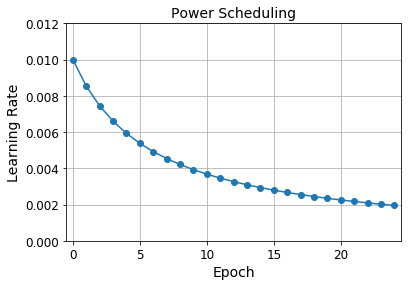

In [163]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs, 'o-')
plt.axis([-0.5, n_epochs - 0.5, 0, 0.012])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Power Scheduling', fontsize=14)
plt.grid(True)

### Exponential Scheduling

In [165]:
def exponential_decay_fn(epoch):
  return 0.01 * 0.1**(epoch / 20)

In [166]:
def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1**(epoch / s)
  return exponential_decay_fn

exponential_decau_fn = exponential_decay(lr0=0.01, s=20)

In [167]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
n_epochs = 25

In [168]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 6s 100us/sample - loss: 0.8503 - accuracy: 0.7562 - val_loss: 0.7115 - val_accuracy: 0.7578
Epoch 2/25
55000/55000 [==============================] - 5s 92us/sample - loss: 0.7107 - accuracy: 0.7861 - val_loss: 0.7508 - val_accuracy: 0.7642
Epoch 3/25
55000/55000 [==============================] - 5s 84us/sample - loss: 0.6246 - accuracy: 0.8084 - val_loss: 0.6204 - val_accuracy: 0.7968
Epoch 4/25
55000/55000 [==============================] - 5s 84us/sample - loss: 0.5598 - accuracy: 0.8278 - val_loss: 0.6224 - val_accuracy: 0.8446
Epoch 5/25
55000/55000 [==============================] - 5s 85us/sample - loss: 0.5242 - accuracy: 0.8365 - val_loss: 0.5441 - val_accuracy: 0.8338
Epoch 6/25
55000/55000 [==============================] - 5s 85us/sample - loss: 0.4533 - accuracy: 0.8541 - val_loss: 0.5239 - val_accuracy: 0.8466
Epoch 7/25
55000/55000 [==============================] 

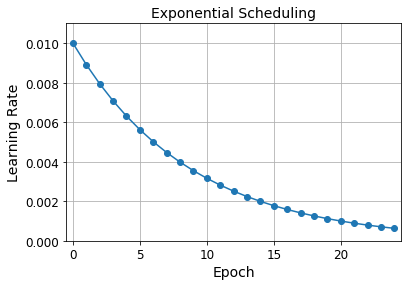

In [170]:
plt.plot(history.epoch, history.history['lr'], 'o-')
plt.axis([-0.5, n_epochs - 0.5, 0, 0.011])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Exponential Scheduling', fontsize=14)
plt.grid(True)

In [171]:
def exponential_decay_fn(epoch, lr):
  return lr * 0.1**(1 / 20)

In [172]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
  def __init__(self, s=40000):
    super().__init__()
    self.s = s
    
  def on_batch_begin(self, batch, logs=None):
    lr = K.get_value(self.model.optimizer.lr)
    K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))
    
  def on_epoch_end(self, epoch, logs=None):
    logs = logs or {}
    logs['lr'] = K.get_value(self.model.optimizer.lr)

In [173]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(10, activation='softmax')
])

In [174]:
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)

In [175]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
n_epochs = 25

In [177]:
s = 20 * len(X_train) // 32
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid), callbacks=[exp_decay])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 6s 110us/sample - loss: 0.7950 - accuracy: 0.7678 - val_loss: 0.7626 - val_accuracy: 0.7202
Epoch 2/25
55000/55000 [==============================] - 5s 96us/sample - loss: 0.6238 - accuracy: 0.8097 - val_loss: 0.5616 - val_accuracy: 0.8304
Epoch 3/25
55000/55000 [==============================] - 5s 96us/sample - loss: 0.5716 - accuracy: 0.8217 - val_loss: 0.6381 - val_accuracy: 0.8120
Epoch 4/25
55000/55000 [==============================] - 5s 96us/sample - loss: 0.5121 - accuracy: 0.8391 - val_loss: 0.6855 - val_accuracy: 0.8114
Epoch 5/25
55000/55000 [==============================] - 5s 96us/sample - loss: 0.4785 - accuracy: 0.8495 - val_loss: 0.5208 - val_accuracy: 0.8556
Epoch 6/25
55000/55000 [==============================] - 5s 96us/sample - loss: 0.4188 - accuracy: 0.8659 - val_loss: 0.5239 - val_accuracy: 0.8542
Epoch 7/25
55000/55000 [==============================] 

In [178]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

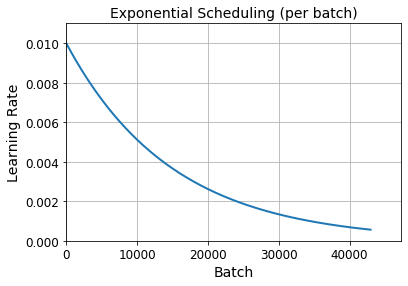

In [182]:
plt.plot(steps, lrs, '-', linewidth=2)
plt.axis([0, n_steps * 1.1, 0, lr0 * 1.1])
plt.xlabel('Batch')
plt.ylabel('Learning Rate')
plt.title('Exponential Scheduling (per batch)', fontsize=14)
plt.grid(True)

### Piecewise Constant Scheduling

In [183]:
def piecewise_constant_fn(epoch):
  if epoch < 5:
    return 0.01
  elif epoch < 15:
    return 0.005
  else:
    return 0.001

In [184]:
def piecewise_constant(boundaries, values):
  boundaries = np.array([0] + boundaries)
  values = np.array(values)
  def piecewise_constant_fn(epoch):
    return values[np.argmax(boundaries > epoch) - 1]
  return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [186]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 5s 100us/sample - loss: 0.8429 - accuracy: 0.7634 - val_loss: 0.9667 - val_accuracy: 0.6432
Epoch 2/25
55000/55000 [==============================] - 5s 86us/sample - loss: 0.8500 - accuracy: 0.7677 - val_loss: 0.6907 - val_accuracy: 0.8070
Epoch 3/25
55000/55000 [==============================] - 5s 87us/sample - loss: 0.7974 - accuracy: 0.7831 - val_loss: 0.8228 - val_accuracy: 0.7608
Epoch 4/25
55000/55000 [==============================] - 5s 84us/sample - loss: 0.8931 - accuracy: 0.7344 - val_loss: 1.1275 - val_accuracy: 0.7434
Epoch 5/25
55000/55000 [==============================] - 5s 85us/sample - loss: 0.9565 - accuracy: 0.7025 - val_loss: 0.8436 - val_accuracy: 0.7664
Epoch 6/25
55000/55000 [==============================] - 5s 85us/sample - loss: 0.6047 - accuracy: 0.7910 - val_loss: 0.7323 - val_accuracy: 0.8054
Epoch 7/25
55000/55000 [==============================] 

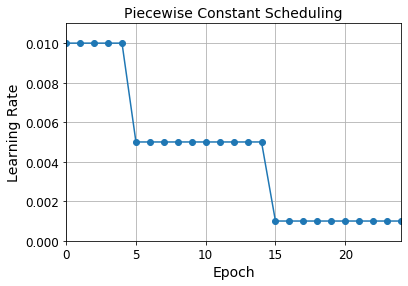

In [187]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], 'o-')
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Piecewise Constant Scheduling', fontsize=14)
plt.grid(True)

### Performance Scheduling

In [188]:
tf.random.set_seed(42)
np.random.seed(42)

In [189]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(10, activation='softmax')
])

In [191]:
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 3s 50us/sample - loss: 0.5950 - accuracy: 0.8063 - val_loss: 0.5177 - val_accuracy: 0.8426
Epoch 2/25
55000/55000 [==============================] - 3s 53us/sample - loss: 0.5091 - accuracy: 0.8373 - val_loss: 0.4850 - val_accuracy: 0.8534
Epoch 3/25
55000/55000 [==============================] - 3s 60us/sample - loss: 0.5029 - accuracy: 0.8437 - val_loss: 0.4905 - val_accuracy: 0.8400
Epoch 4/25
55000/55000 [==============================] - 3s 50us/sample - loss: 0.5372 - accuracy: 0.8436 - val_loss: 0.6500 - val_accuracy: 0.8378
Epoch 5/25
55000/55000 [==============================] - 3s 47us/sample - loss: 0.5189 - accuracy: 0.8497 - val_loss: 0.4873 - val_accuracy: 0.8618
Epoch 6/25
55000/55000 [==============================] - 3s 48us/sample - loss: 0.5190 - accuracy: 0.8515 - val_loss: 0.8216 - val_accuracy: 0.8420
Epoch 7/25
55000/55000 [==============================] -

Text(0.5, 1.0, 'Reduce LR on Plateau')

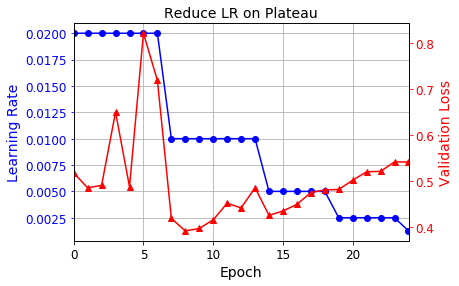

In [192]:
plt.plot(history.epoch, history.history['lr'], 'bo-')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate', color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history['val_loss'], 'r^-')
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title('Reduce LR on Plateau', fontsize=14)

### tf.keras schedulers

In [194]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(10, activation='softmax')
])

In [195]:
s = 20 * len(X_train) // 32
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 3s 50us/sample - loss: 0.4872 - accuracy: 0.8296 - val_loss: 0.4141 - val_accuracy: 0.8548
Epoch 2/25
55000/55000 [==============================] - 2s 42us/sample - loss: 0.3829 - accuracy: 0.8643 - val_loss: 0.3773 - val_accuracy: 0.8704
Epoch 3/25
55000/55000 [==============================] - 2s 43us/sample - loss: 0.3495 - accuracy: 0.8763 - val_loss: 0.3696 - val_accuracy: 0.8730
Epoch 4/25
55000/55000 [==============================] - 2s 43us/sample - loss: 0.3274 - accuracy: 0.8831 - val_loss: 0.3545 - val_accuracy: 0.8760
Epoch 5/25
55000/55000 [==============================] - 2s 43us/sample - loss: 0.3102 - accuracy: 0.8899 - val_loss: 0.3460 - val_accuracy: 0.8784
Epoch 6/25
55000/55000 [==============================] - 2s 43us/sample - loss: 0.2971 - accuracy: 0.8945 - val_loss: 0.3415 - val_accuracy: 0.8796
Epoch 7/25
55000/55000 [==============================] -

In [197]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch], values=[0.01, 0.005, 0.001])

### 1Cycle scheduling

In [205]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
  def __init__(self, factor):
    self.factor = factor
    self.rates = []
    self.losses = []
  def on_batch_end(self, batch, logs):
    self.rates.append(K.get_value(self.model.optimizer.lr))
    self.losses.append(logs['loss'])
    K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [206]:
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
  init_weights = model.get_weights()
  iterations = len(X) // batch_size * epochs
  factor = np.exp(np.log(max_rate / min_rate) / iterations)
  init_lr = K.get_value(model.optimizer.lr)
  K.set_value(model.optimizer.lr, min_rate)
  exp_lr = ExponentialLearningRate(factor)
  history = model.fit(X, y, epochs=epochs, batch_size=batch_size, callbacks=[exp_lr])
  K.set_value(model.optimizer.lr, init_lr)
  model.set_weights(init_weights)
  return exp_lr.rates, exp_lr.losses

In [212]:
def plot_lr_vs_loss(rates, losses):
  plt.plot(rates, losses)
  plt.gca().set_xscale('log')
  plt.hlines(min(losses), min(rates), max(rates))
  plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
  plt.xlabel('Learning rate')
  plt.ylabel('Loss')

In [213]:
tf.random.set_seed(42)
np.random.seed(42)

In [214]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(10, activation='softmax')
  
])

In [215]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])


Train on 55000 samples
55000/55000 [==============================] - 1s 23us/sample - loss: nan - accuracy: 0.3879


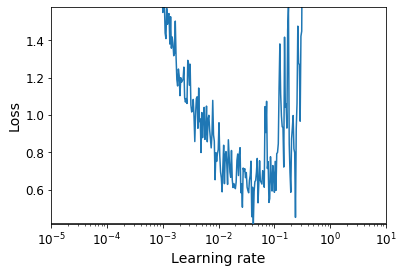

In [216]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [219]:
class OneCycleScheduler(keras.callbacks.Callback):
  def __init__(self, iterations, max_rate, start_rate=None, last_iterations=None, last_rate=None):
    self.iterations = iterations
    self.max_rate = max_rate
    self.start_rate = start_rate or max_rate / 10
    self.last_iterations = last_iterations or iterations // 10 + 1
    self.half_iteration = (iterations - self.last_iterations) // 2
    self.last_rate = last_rate or self.start_rate / 1000
    self.iteration = 0
    
  def _interpolate(self, iter1, iter2, rate1, rate2):
    return ((rate2 - rate1) * (self.iteration - iter1) / (iter2 - iter1) + rate1)
  
  def on_batch_begin(self, batch, logs):
    if self.iteration < self.half_iteration:
      rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
    elif self.iteration < 2 * self.half_iteration:
      rate = self._interpolate(self.half_iteration, 2 * self.half_iteration, self.max_rate, self.start_rate)
    else: 
      rate = self._interpolate(2 * self.half_iteration, self.iterations, self.start_rate, self.last_rate)
      rate = max(rate, self.last_rate)
    self.iteration += 1
    K.set_value(self.model.optimizer.lr, rate)

In [220]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_valid_scaled, y_valid), callbacks=[onecycle])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 1s 20us/sample - loss: 0.6576 - accuracy: 0.7743 - val_loss: 0.4901 - val_accuracy: 0.8300
Epoch 2/25
55000/55000 [==============================] - 1s 22us/sample - loss: 0.4587 - accuracy: 0.8387 - val_loss: 0.4316 - val_accuracy: 0.8490
Epoch 3/25
55000/55000 [==============================] - 1s 23us/sample - loss: 0.4119 - accuracy: 0.8560 - val_loss: 0.4117 - val_accuracy: 0.8580
Epoch 4/25
55000/55000 [==============================] - 1s 20us/sample - loss: 0.3842 - accuracy: 0.8657 - val_loss: 0.3920 - val_accuracy: 0.8638
Epoch 5/25
55000/55000 [==============================] - 1s 20us/sample - loss: 0.3636 - accuracy: 0.8708 - val_loss: 0.3739 - val_accuracy: 0.8710
Epoch 6/25
55000/55000 [==============================] - 1s 20us/sample - loss: 0.3460 - accuracy: 0.8767 - val_loss: 0.3742 - val_accuracy: 0.8690
Epoch 7/25
55000/55000 [==============================] -

# Avoiding Overfitting Through Regularization

## L1 and L2 regularization

In [221]:
layer = keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.01))

In [222]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.01)),
  keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.01)),
  keras.layers.Dense(10, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01))
])

In [223]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 6s 104us/sample - loss: 1.5735 - accuracy: 0.8126 - val_loss: 0.7327 - val_accuracy: 0.8222
Epoch 2/2
55000/55000 [==============================] - 5s 97us/sample - loss: 0.7186 - accuracy: 0.8260 - val_loss: 0.6929 - val_accuracy: 0.8338


In [224]:
from functools import partial

In [227]:
RegularizedDense = partial(keras.layers.Dense, activation='elu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.01))

In [228]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  RegularizedDense(300),
  RegularizedDense(100),
  RegularizedDense(10, activation='softmax')
])

In [229]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [230]:
n_epochs=2

In [231]:
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 6s 104us/sample - loss: 1.6006 - accuracy: 0.8129 - val_loss: 0.7374 - val_accuracy: 0.8236
Epoch 2/2
55000/55000 [==============================] - 5s 94us/sample - loss: 0.7179 - accuracy: 0.8265 - val_loss: 0.6905 - val_accuracy: 0.8356


## Dropout

In [232]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dropout(rate=0.2),
  keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
  keras.layers.Dropout(rate=0.2),
  keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
  keras.layers.Dropout(rate=0.2),
  keras.layers.Dense(10, activation='softmax')
])

In [233]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [235]:
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 7s 119us/sample - loss: 0.5856 - accuracy: 0.7992 - val_loss: 0.3908 - val_accuracy: 0.8570
Epoch 2/2
55000/55000 [==============================] - 5s 99us/sample - loss: 0.4260 - accuracy: 0.8443 - val_loss: 0.3389 - val_accuracy: 0.8730


## Alpha Dropout

In [236]:
tf.random.set_seed(42)
np.random.seed(42)

In [237]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.AlphaDropout(rate=0.2),
  keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.AlphaDropout(rate=0.2),
  keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.AlphaDropout(rate=0.2),
  keras.layers.Dense(10, activation='softmax')
])

In [238]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)

In [239]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [240]:
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 65us/sample - loss: 0.6616 - accuracy: 0.7616 - val_loss: 0.6682 - val_accuracy: 0.8258
Epoch 2/20
55000/55000 [==============================] - 3s 58us/sample - loss: 0.5526 - accuracy: 0.7969 - val_loss: 0.5835 - val_accuracy: 0.8382
Epoch 3/20
55000/55000 [==============================] - 3s 58us/sample - loss: 0.5259 - accuracy: 0.8060 - val_loss: 0.5312 - val_accuracy: 0.8512
Epoch 4/20
55000/55000 [==============================] - 3s 58us/sample - loss: 0.5076 - accuracy: 0.8111 - val_loss: 0.4969 - val_accuracy: 0.8606
Epoch 5/20
55000/55000 [==============================] - 3s 58us/sample - loss: 0.4929 - accuracy: 0.8175 - val_loss: 0.4875 - val_accuracy: 0.8610
Epoch 6/20
55000/55000 [==============================] - 3s 59us/sample - loss: 0.4844 - accuracy: 0.8190 - val_loss: 0.5141 - val_accuracy: 0.8552
Epoch 7/20
55000/55000 [==============================] -

In [241]:
model.evaluate(X_test_scaled, y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.4736 - accuracy: 0.8648


[0.47358015085458754, 0.8648]

In [242]:
model.evaluate(X_train_scaled, y_train)

55000/55000 [==============================] - 2s 28us/sample - loss: 0.3532 - accuracy: 0.8859


[0.35321958436965945, 0.8859091]

## MC Dropout

In [243]:
tf.random.set_seed(42)
np.random.seed(42)

In [244]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [245]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [246]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.4 , 0.  , 0.6 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.75, 0.  , 0.25]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.01, 0.  , 0.77]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.14, 0.  , 0.81]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.1 , 0.  , 0.88]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.15, 0.  , 0.78]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.1 , 0.  , 0.89]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.41, 0.  , 0.05, 0.  , 0.54]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.08, 0.  , 0.88]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.15, 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.38, 0.  , 0.1 , 0.  , 0.52]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.24, 0.  , 0.68]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.24, 0.  , 0

In [247]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.16, 0.  , 0.77]],
      dtype=float32)

In [248]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.17, 0.  , 0.2 ]],
      dtype=float32)

In [249]:
y_pred = np.argmax(y_proba, axis=1)

In [250]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8652

In [251]:
class MCDropout(keras.layers.Dropout):
  def call(self, inputs):
    return super().call(inputs, training=True)

In [252]:
class MCAlphaDropout(keras.layers.AlphaDropout):
  def call(self, inputs):
    return super().call(inputs, training=True)

In [253]:
tf.random.set_seed(42)
np.random.seed(42)

In [254]:
mc_model = keras.models.Sequential([
  MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer for layer in model.layers
])

In [255]:
mc_model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_27 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_486 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_487 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_488 (Dense)            (None, 10)              

In [256]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [257]:
mc_model.set_weights(model.get_weights())

In [259]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.21, 0.  , 0.71]],
      dtype=float32)

## Max norm

In [260]:
layer = keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal', kernel_constraint=keras.constraints.max_norm(1.))

In [261]:
MaxNormDense = partial(keras.layers.Dense, activation='selu', kernel_initializer='lecun_normal', kernel_constraint=keras.constraints.max_norm(1.))

In [262]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  MaxNormDense(300),
  MaxNormDense(100),
  keras.layers.Dense(10, activation='softmax')
])

In [264]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 6s 106us/sample - loss: 0.4734 - accuracy: 0.8364 - val_loss: 0.3999 - val_accuracy: 0.8614
Epoch 2/2
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3583 - accuracy: 0.8685 - val_loss: 0.3494 - val_accuracy: 0.8746
